### Question 8.2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv, pinv
from sklearn.model_selection import train_test_split

class SinusoidalRegressor:
    def __init__(self):
        self.k = None
        self.weights = None

    def phi(self, x):
        # The basis function for a general 2k
        x = np.array(x).reshape(-1, 1)
        features = [np.ones_like(x)]  # w0 (bias term)
        for i in range(1, self.k + 1):
            features.append(np.sin(i * x))
            features.append(np.cos(i * x))
        return np.hstack(features)
        

    def fit(self, X_train, Y_train, k):
        self.k = k
        # Construct the design matrix Phi for all data points in X_train
        Phi = self.phi(X_train)
        # Solve for the weights using the normal equation with a pseudo-inverse
        # Make sure the shapes align: Phi.T @ Phi should be a square matrix and Phi.T @ Y_train should be a vector  
        self.weights = pinv(Phi.T @ Phi) @ Phi.T @ Y_train

    def predict(self, X):
        # Check if the model is fitted
        if self.weights is None:
            raise ValueError("Model is not fitted yet.")
        # Apply the learned model
        return self.phi(X) @ self.weights

    def rmse(self, X_val, Y_val):
        # Predict the values for X_val
        Y_pred = self.predict(X_val)
        # Calculate the RMSE
        return np.sqrt(np.mean((Y_pred - Y_val) ** 2))

In [8]:
np.random.seed(61)
csv_file = 'nonlinear-regression-data.csv'
data = pd.read_csv(csv_file)
x = np.array(data['X'])
y = np.array(data['Noisy_y'])

print(x.shape, y.shape)
### Evaluation Part 0 #################################################################################

# Split the data

X_train, X_val, Y_train, Y_val = train_test_split(x, y, train_size=45, test_size=16, random_state=61)

### Evaluation Part 1 and 2 #################################################################################

# Initialize the model
model = SinusoidalRegressor()
# Vary k from 1 to 10 and obtain RMSE error on the training set and validation set
train_errors = []
val_errors = []
for k in range(1, 11):
    model.fit(X_train, Y_train, k)
    train_errors.append(model.rmse(X_train, Y_train))
    val_errors.append(model.rmse(X_val, Y_val))
    # print(f"Training RMSE for k={k}: {model.rmse(X_train, Y_train)}")
    # print(f"Validation RMSE for k={k}: {model.rmse(X_val, Y_val)}")



(61,) (61,)


### Question 8.3: 1 and 2

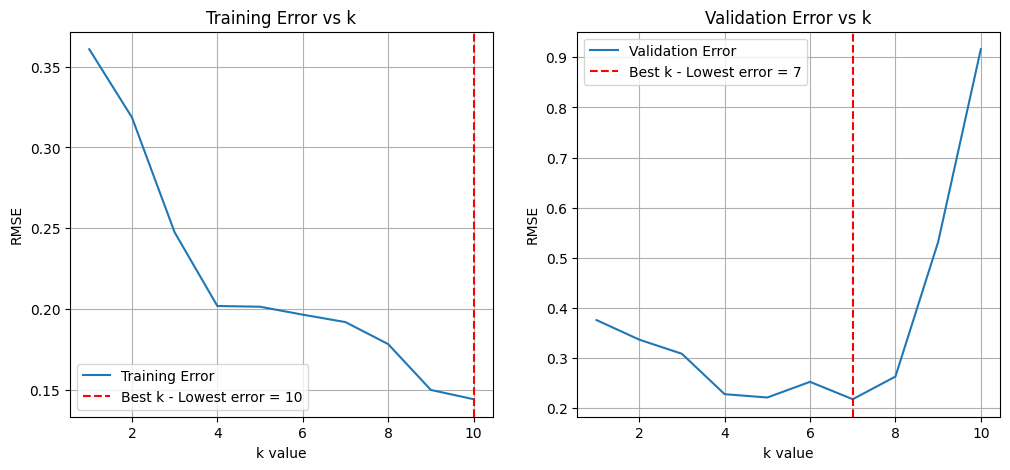

In [9]:
# Plotting the training error versus k
plt.figure(figsize=(12, 5)) 

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_errors, label='Training Error')
plt.axvline(x=np.argmin(train_errors) + 1, color='r', linestyle='--', label='Best k - Lowest error = {}'.format(np.argmin(train_errors) + 1))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.title('Training Error vs k')
plt.legend()
plt.grid()

# Plotting the validation error versus k

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), val_errors, label='Validation Error')
plt.axvline(x=np.argmin(val_errors) + 1, color='r', linestyle='--', label='Best k - Lowest error = {}'.format(np.argmin(val_errors) + 1))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.title('Validation Error vs k')
plt.legend()
plt.grid()

plt.show()

### Question 8.3: 3 - Optimal k comparism

The optimal 𝑘 for training error is 10, while for validation error, it is 7, indicating that the model fits the training data better with higher 𝑘 but does not generalize well. The difference arises because increasing 𝑘 reduces training error but leads to overfitting, causing validation error to increase beyond 𝑘 = 7.

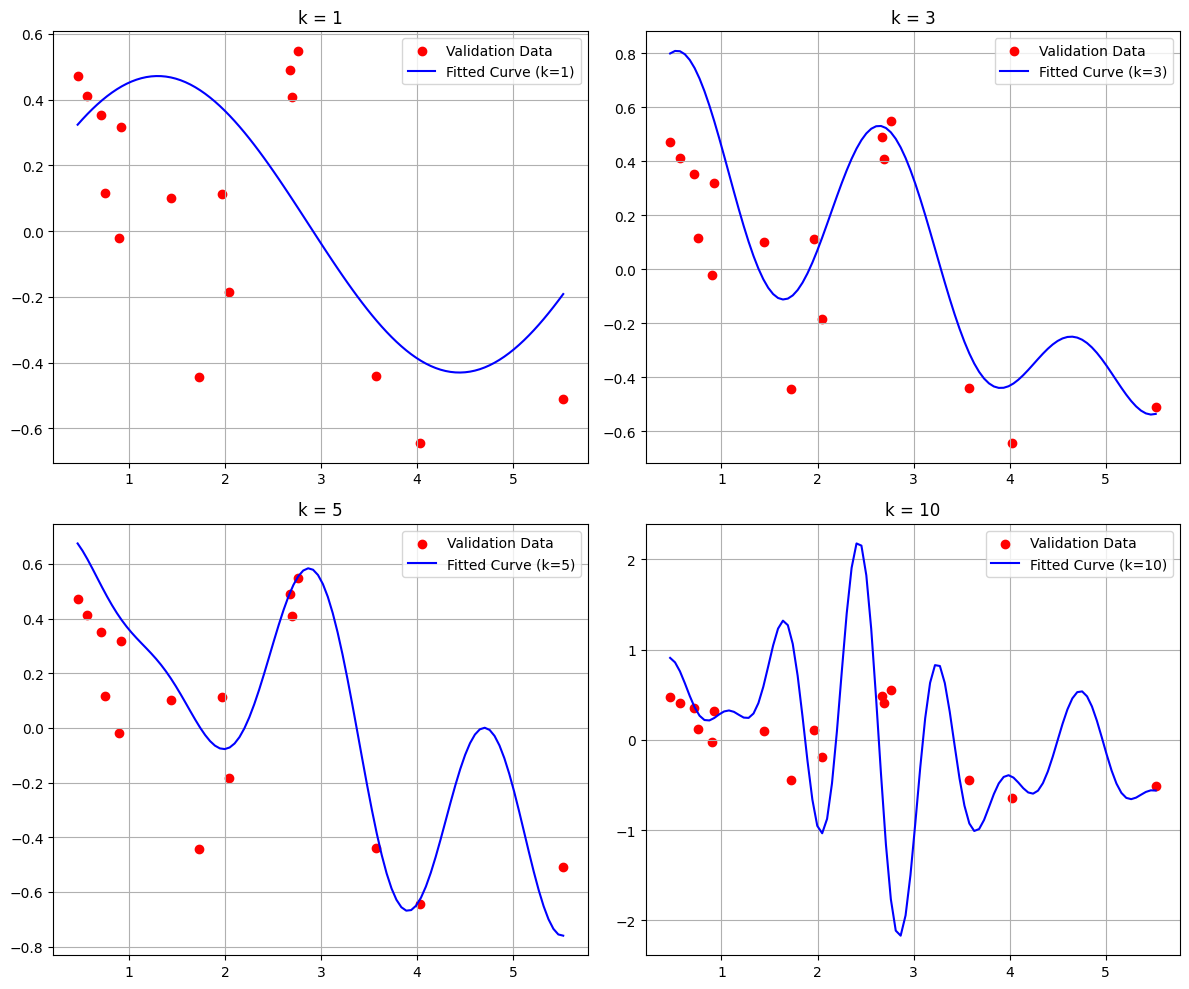

In [10]:
### Evaluation Part 4 #################################################################################
# You will reate separate plots for each k you can use plt.subplots function
# Scatter plots with fitted lines for k = 1, 3, 5, 10
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
k_values_to_plot = [1, 3, 5, 10]

for ax, k in zip(axes.ravel(), k_values_to_plot):
    model.fit(X_train, Y_train, k)
    x_plot = np.linspace(min(X_val), max(X_val), 100)
    y_plot = model.predict(x_plot)
    ax.scatter(X_val, Y_val, color='red', label='Validation Data')
    ax.plot(x_plot, y_plot, color='blue', label=f'Fitted Curve (k={k})')
    ax.set_title(f'k = {k}')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()